In [0]:
import cv2

In [0]:
import matplotlib.pyplot as plt

In [53]:
!curl -L https://www.dropbox.com/s/v4225z25x0zz4y3/pool.jpg\
  -o pool.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1587k  100 1587k    0     0  1444k      0  0:00:01  0:00:01 --:--:-- 28.4M


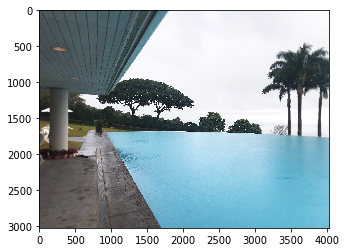

In [54]:
img = cv2.imread('pool.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

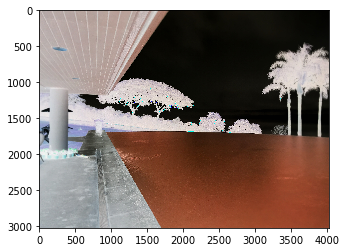

In [55]:
img2 =  -img
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

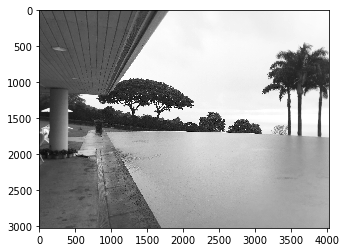

In [56]:
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img3, cmap='gray')

In [57]:
[i for i in dir(cv2) if i.startswith('COLOR_')]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

In [58]:
cv2.imwrite('pool_2.jpg',img)

True

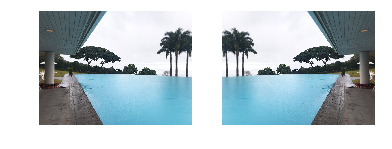

In [59]:
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
img2 = cv2.flip(img,1)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

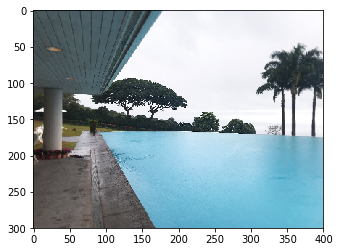

In [60]:
img2 = cv2.resize(img,(400,300))
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB ))

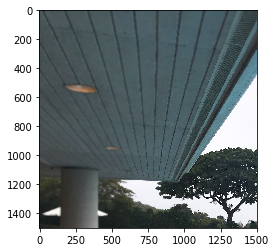

In [61]:
im2 = img[0:1500, 0:1500]
plt.imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))

###얼굴을 검출하는 기능

In [62]:
!curl -L https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt.xml \
  -o hear.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6164k    0 6164k    0     0  6796k      0 --:--:-- --:--:-- --:--:-- 6789k


In [0]:
file = 'hear.xml'

In [0]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [65]:
!curl -L https://www.dropbox.com/s/BBq6oxlu03twfze/families.jpg \
  -o family.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1246    0  1246    0     0   3905      0 --:--:-- --:--:-- --:--:--     0


In [67]:
img= cv2.imread('family.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

error: ignored

In [0]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img3, minSize=(150,150))

if len(face_list)==0:
  print('얼굴인식실패')
  quit()
for (x,y,w,h) in face_list:
  print('얼굴의 좌표값은',x,y,t,h)
  red=(0,0,255)
  cv2.rectangle(img3, (x,y), (x+w, y+h), rde, thickness=20)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
def mosaic(img, rect, size):
  (x1, y1, x2, y2) = rect
  w = x2 - x1
  h= y2- y1
  i_rect = img[y1:y2, x1:x2]
  i_small = cv2.resize(i_rect, (size, size))
  i_moss = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)
  img2 =  img.copy()
  img2[y1:y2, x1:x2] =  i_mos
  return img2

In [0]:
# 얼굴부분만 모자이크 처리하기

for(x,y,w,h) in face_list:
  img = mosaic(img, (x,y,x+w,y+h), 10)
  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))